# OpenWeather.org API
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
Perform a weather check on each city using a series of successive API calls to openweather.org



In [3]:
# Setup a list of dict objects, one for each city
weatherList = {}
# for city in cities:
count = len(cities) # 10
for index in range(0,count):
    city = cities[index]
    print(f'Processing Record {index} | {city}')
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&APPID={weather_api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        weatherData = response.json() # Returns a dict

    # As dict - you need to use DictWriter
    # cityWeather = {
    #     'City': city,
    #     'Lat': weatherData['coord']['lat'],
    #     'Lng': weatherData['coord']['lon'],
    #     'Max Temp': weatherData['main']['temp_max'],
    #     'Humidity': weatherData['main']['humidity'],
    #     'Cloudiness': weatherData['clouds']['all'],
    #     'Wind Speed': weatherData['wind']['speed'],
    #     'Country': weatherData['sys']['country'],
    #     'Date': weatherData['dt']
    # }

    # As list - simply use csv.writer - order of these fields matters so they match desired CSV
    
        cityWeather = [
                city,
                weatherData['clouds']['all'],
                weatherData['sys']['country'],
                weatherData['dt'],
                weatherData['main']['humidity'],
                weatherData['coord']['lat'],
                weatherData['coord']['lon'],
                weatherData['main']['temp_max'],
                weatherData['wind']['speed'],
        ]
        weatherList[index] = cityWeather
    else:
        print('City not found. Skipping...')

print('Data Retrieval Complete')
print('-----------------------------')

ound. Skipping...
Processing Record 43 | arraial do cabo
Processing Record 44 | north las vegas
Processing Record 45 | sobolevo
Processing Record 46 | ribeira grande
Processing Record 47 | geraldton
Processing Record 48 | severo-kurilsk
Processing Record 49 | vaini
Processing Record 50 | provideniya
Processing Record 51 | anloga
Processing Record 52 | taolanaro
City not found. Skipping...
Processing Record 53 | kindu
Processing Record 54 | gizo
Processing Record 55 | codrington
Processing Record 56 | souillac
Processing Record 57 | nikolskoye
Processing Record 58 | sovetskiy
Processing Record 59 | jumla
Processing Record 60 | bredasdorp
Processing Record 61 | kang
Processing Record 62 | new norfolk
Processing Record 63 | parksville
Processing Record 64 | kavieng
Processing Record 65 | hilo
Processing Record 66 | port elizabeth
Processing Record 67 | langres
Processing Record 68 | sulurpeta
City not found. Skipping...
Processing Record 69 | nantong
Processing Record 70 | parrita
Process

### Convert Raw Data to DataFrame
Export the city data into a .csv and display the DataFrame

In [22]:
# Just for fun the columns of the DataFrame do not match the columns of the CSV
df=pd.DataFrame.from_dict(weatherList, orient='index', columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])
df.to_csv(output_data_file,",",header=True, index=True, index_label='City ID',columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])
df[['City','Lat','Lng','Max Temp','Humidity','Wind Speed','Cloudiness','Country','Date']].head(5)


,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
1,dunedin,-45.87,170.50,64.65,56,11.10,100,NZ,1603573340
2,sinnamary,5.38,-52.95,83.17,74,12.57,41,GF,1603573340
3,puerto ayora,-0.74,-90.35,77.00,73,14.99,40,EC,1603573340
4,hermanus,-34.42,19.23,62.01,91,4.00,6,ZA,1603573340
5,busselton,-33.65,115.33,57.00,50,10.00,71,AU,1603573341


In [23]:
df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.039388,17.729209,59.598345,73.030576,54.697842,8.372374,1.603573e+09
std,33.379062,92.619600,20.861659,20.598980,39.163534,5.913992,6.761243e+01
min,-54.800000,-179.170000,6.930000,1.000000,0.000000,0.400000,1.603573e+09
25%,-6.915000,-65.130000,44.615000,62.750000,11.750000,3.845000,1.603573e+09
50%,25.480000,23.520000,65.685000,78.000000,70.000000,6.945000,1.603573e+09
75%,47.807500,101.505000,77.000000,88.250000,90.000000,11.410000,1.603573e+09
max,78.220000,178.420000,96.800000,100.000000,100.000000,42.970000,1.603573e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
# df[df['Humidity'] > 100.0] # Change to > 100.0
df[df['Humidity'] > 100.0]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [25]:
#  Get the indices of cities that have humidity over 100%.
df[df['Humidity'] > 100.0].index
# outlierIndexes = pd.DataFrame(df[df['Humidity'] < 80.0].index, columns=['Index of City']) # Change to > 100.0
# outlierIndexes

Int64Index([], dtype='int64')

In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [27]:
# Get names of indexes for which column Age has value 30
indexNames = df[df['Humidity'] > 100.0 ].index

# Delete these row indexes from dataFrame
clean_city_data = df.drop(indexNames , inplace=False)

clean_city_data


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,dunedin,100,NZ,1603573340,56,-45.87,170.50,64.65,11.10
2,sinnamary,41,GF,1603573340,74,5.38,-52.95,83.17,12.57
3,puerto ayora,40,EC,1603573340,73,-0.74,-90.35,77.00,14.99
4,hermanus,6,ZA,1603573340,91,-34.42,19.23,62.01,4.00
5,busselton,71,AU,1603573341,50,-33.65,115.33,57.00,10.00
...,...,...,...,...,...,...,...,...,...
599,iracemapolis,75,BR,1603573259,61,-22.58,-47.52,78.80,3.36
601,chunhuhub,79,MX,1603573402,88,19.55,-88.68,84.38,3.85
602,yerbogachen,100,RU,1603573402,97,61.28,108.01,23.97,3.13
603,rawlins,90,US,1603573402,42,41.79,-107.24,46.40,23.04


## Latitude vs. Temperature Plot

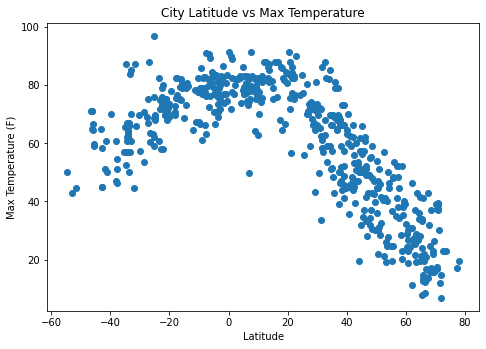

In [28]:
x = clean_city_data['Lat']
y = clean_city_data['Max Temp']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y)
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
ax.set_title('City Latitude vs Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

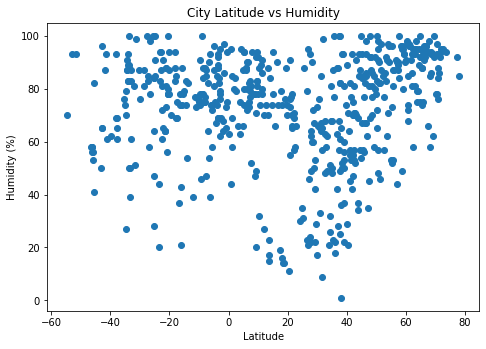

In [29]:
x = clean_city_data['Lat']
y = clean_city_data['Humidity']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y)
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_title('City Latitude vs Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

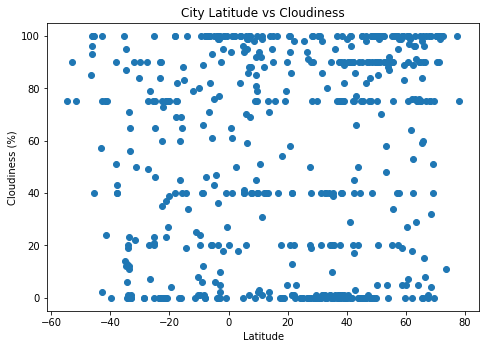

In [30]:
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y)
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.set_title('City Latitude vs Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

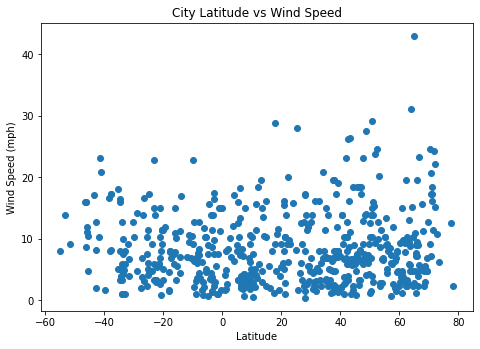

In [31]:
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y)
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.set_title('City Latitude vs Wind Speed')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8826983150563243


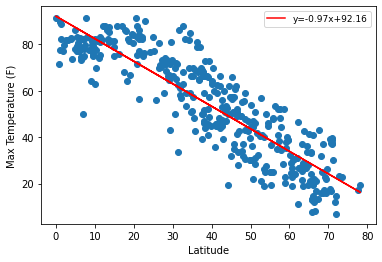

In [32]:
x = clean_city_data[clean_city_data['Lat'] > 0.0]['Lat']
y = clean_city_data[clean_city_data['Lat'] > 0.0]['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(f'The r-value is: {r_value}')
fig=plt.figure()
# ax=fig.add_axes([0,0,1,1])
# ax.scatter(x, y)
# ax.set_xlabel('Latitude')
# ax.set_ylabel('Max Temperature (F)')
# ax.set_title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
# plt.title('City Latitude vs Max Temperature')
plt.plot(x, y, 'o')
# plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6557565365285641


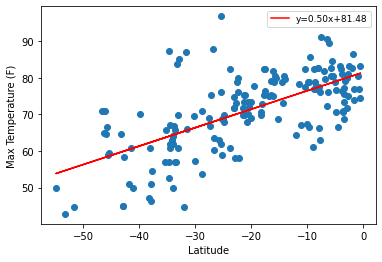

In [33]:
x = clean_city_data[clean_city_data['Lat'] < 0.0]['Lat']
y = clean_city_data[clean_city_data['Lat'] < 0.0]['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(f'The r-value is: {r_value}')
fig=plt.figure()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.plot(x, y, 'o')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2992464867030252


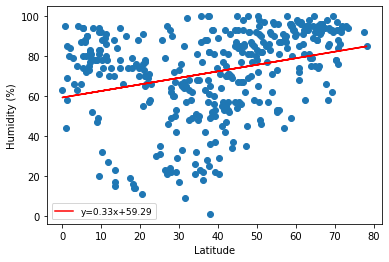

In [34]:
x = clean_city_data[clean_city_data['Lat'] > 0.0]['Lat']
y = clean_city_data[clean_city_data['Lat'] > 0.0]['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(f'The r-value is: {r_value}')
fig=plt.figure()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x, y, 'o')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10472513846837135


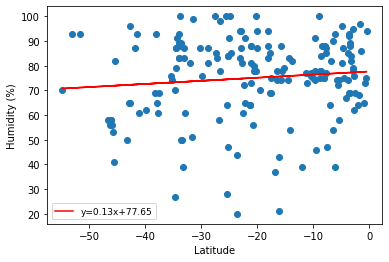

In [35]:
x = clean_city_data[clean_city_data['Lat'] < 0.0]['Lat']
y = clean_city_data[clean_city_data['Lat'] < 0.0]['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(f'The r-value is: {r_value}')
fig=plt.figure()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x, y, 'o')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12070483092700043


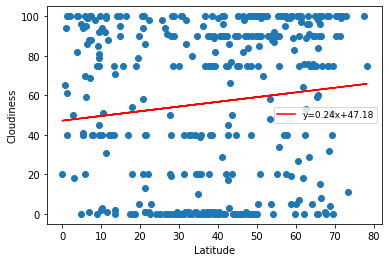

In [36]:
x = clean_city_data[clean_city_data['Lat'] > 0.0]['Lat']
y = clean_city_data[clean_city_data['Lat'] > 0.0]['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(f'The r-value is: {r_value}')
fig=plt.figure()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x, y, 'o')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.012686520881417685


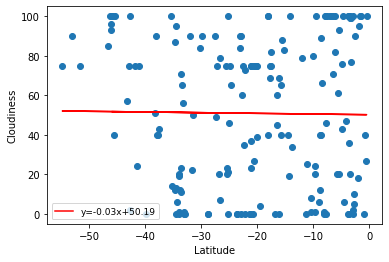

In [37]:
x = clean_city_data[clean_city_data['Lat'] < 0.0]['Lat']
y = clean_city_data[clean_city_data['Lat'] < 0.0]['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(f'The r-value is: {r_value}')
fig=plt.figure()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x, y, 'o')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12135357772137613


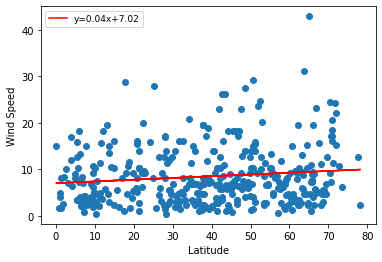

In [38]:
x = clean_city_data[clean_city_data['Lat'] > 0.0]['Lat']
y = clean_city_data[clean_city_data['Lat'] > 0.0]['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(f'The r-value is: {r_value}')
fig=plt.figure()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x, y, 'o')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22118849834193113


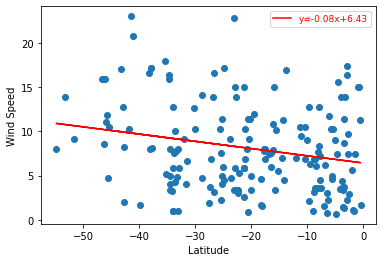

In [39]:
x = clean_city_data[clean_city_data['Lat'] < 0.0]['Lat']
y = clean_city_data[clean_city_data['Lat'] < 0.0]['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(f'The r-value is: {r_value}')
fig=plt.figure()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x, y, 'o')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9, labelcolor='red')
plt.show()